# Homework 6

In [38]:
from sklearn import datasets
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score, silhouette_score, accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

## Question 1 : Several simulated datasets

### 0. Simulate the following data clusters:

- Noisy circles: two concentric circles, a smaller inner circle and a larger outer circle with noise.

- Noisy moons: two interleaving half circles with noise.

- Varied: clusters that have varied standard deviations where some clusters are more spread out, while others are tightly packed.

- Anisotropic: stretched or skewed in different directions clusters.

- Blobs: multiple Gaussian-distributed clusters. Each cluster is spherical and equally distributed in terms of variance.

- No Structure: unstructured set of points generated by drawing from a uniform distribution

Use the follow code to generate the data:

In [18]:
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), np.zeros(n_samples)
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]

### 1. Use StandardScaler() to normalize the data. Plot the data in a 3×2 matrix

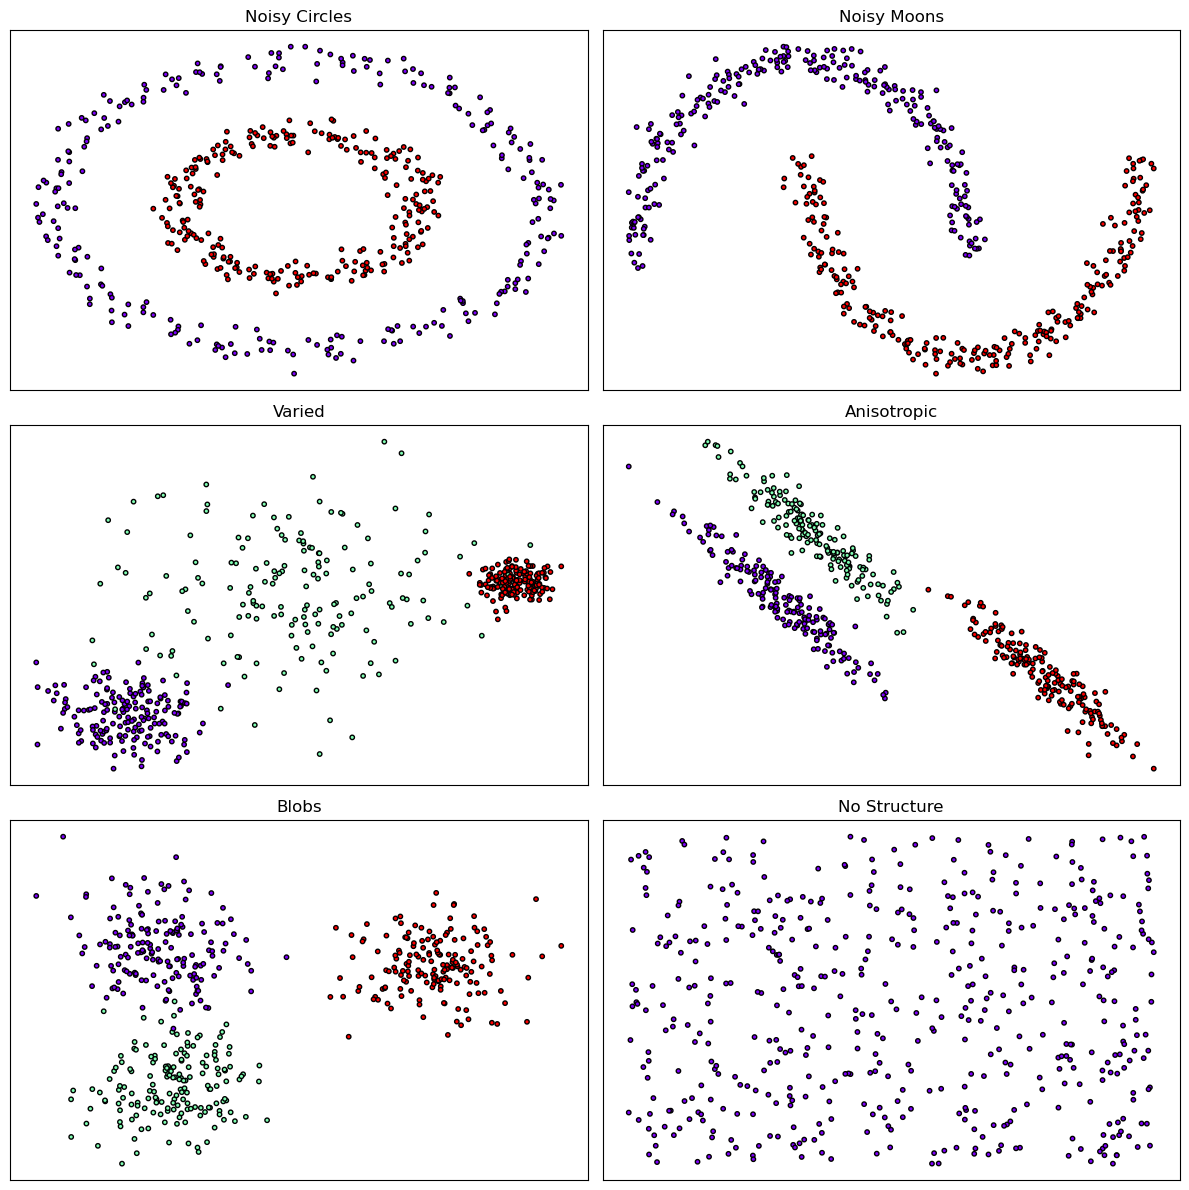

In [20]:
titles = ["Noisy Circles", "Noisy Moons", "Varied", "Anisotropic", "Blobs", "No Structure"]

# Normalize datasets
scaler = StandardScaler()
normalized_datasets = [(scaler.fit_transform(X), y) for X, y in datasets]

# Plot the datasets in a 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for ax, (X, y), title in zip(axes.ravel(), normalized_datasets, titles):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow", edgecolor="k", s=10)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

### 2. Estimate a Gaussian Mixture Model and plot the model prediction for each dataset.

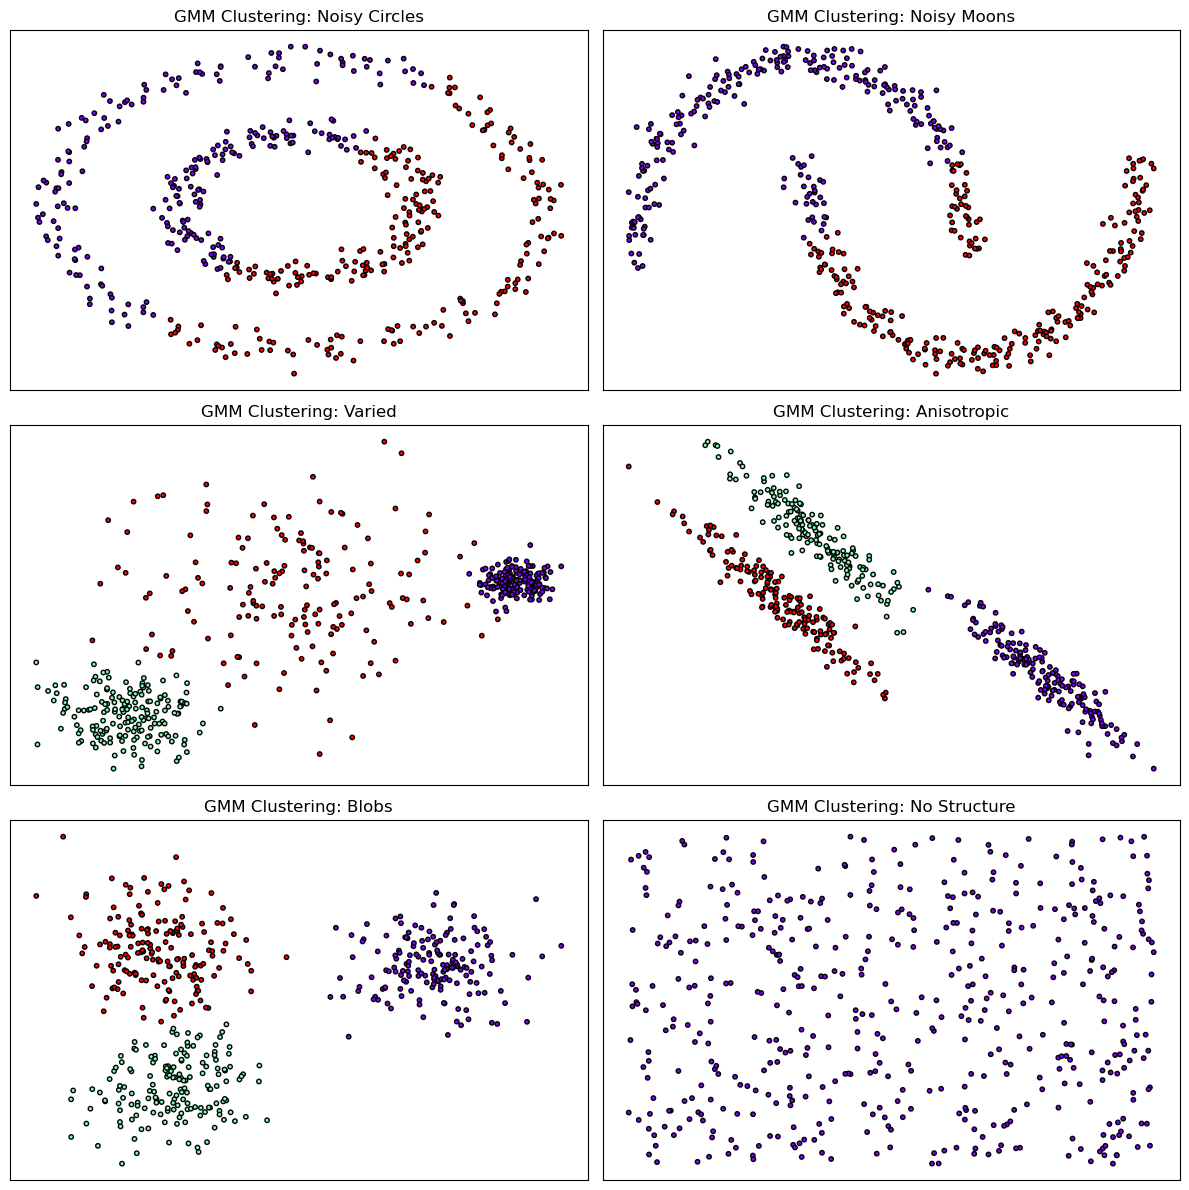

In [24]:
gmm_models = [GaussianMixture(n_components=len(np.unique(y)), random_state=seed).fit(X) for X, y in normalized_datasets]
gmm_predictions = [model.predict(X) for model, (X, y) in zip(gmm_models, normalized_datasets)]
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for ax, (X, y_pred), title in zip(axes.ravel(), zip([X for X, y in normalized_datasets], gmm_predictions), titles):
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="rainbow", edgecolor="k", s=10)
    ax.set_title(f"GMM Clustering: {title}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

### 3. Compute the adjusted Rand Index, Fowlkes-Mallows score, and silhouette score. Also, compute the accuracy score (since these are simulated datasets, the labels are known).

In [19]:

metrics_results = []

for (X, y), y_pred in zip(normalized_datasets, gmm_predictions):
    
    ari = adjusted_rand_score(y, y_pred)

    
    fms = fowlkes_mallows_score(y, y_pred)

    
    silhouette = silhouette_score(X, y_pred) if len(np.unique(y_pred)) > 1 else np.nan

    
    acc = accuracy_score(y, y_pred)

    
    metrics_results.append([ari, fms, silhouette, acc])


import pandas as pd

metrics_df = pd.DataFrame(metrics_results, columns=["Adjusted Rand Index", "Fowlkes-Mallows Score", "Silhouette Score", "Accuracy Score"], index=titles)

print(metrics_df)

               Adjusted Rand Index  Fowlkes-Mallows Score  Silhouette Score  \
Noisy Circles            -0.001991               0.498101          0.351048   
Noisy Moons               0.505956               0.752681          0.496222   
Varied                    0.946819               0.964478          0.588073   
Anisotropic               1.000000               1.000000          0.458743   
Blobs                     0.964437               0.976246          0.653786   
No Structure              1.000000               1.000000               NaN   

               Accuracy Score  
Noisy Circles           0.498  
Noisy Moons             0.856  
Varied                  0.010  
Anisotropic             0.334  
Blobs                   0.324  
No Structure            1.000  


### 4. Identify which types of data clusters the Gaussian Mixture Model performed well, and which it performed poorly. Explain why.

1.
**Where GMM Performed Well**

Blobs & Anisotropic Clusters

- Blobs had high ARI (0.96), FMS (0.97), Silhouette Score (0.65), and Accuracy (0.324).

- Anisotropic Clusters had perfect ARI (1.00), FMS (1.00), and a reasonable silhouette score (0.46).

**Reason**

GMM works well with Gaussian-distributed clusters, which is exactly how the blobs are generated.

It can also handle stretched clusters (anisotropic) as long as they retain an elliptical shape.

2.
**Where GMM Performed Poorly**
  
Noisy Circles:
- Very low ARI (-0.001991), FMS (0.498), and accuracy (0.49).
- Silhouette Score (~0.35) suggests poor cluster separation.

**Reason:**\
GMM assumes elliptical clusters, while noisy circles have a ring-like structure.
It fails to capture the circular pattern and instead assigns labels inconsistently.

Varied Clusters:
- ARI (0.95) and FMS (0.96) seem high, but accuracy (~0.01) is misleading.
- Silhouette Score (~0.58) indicates some level of incorrect clustering.
  
**Reason:**\
The varied standard deviations (some clusters are tight, others are widely spread) confuse GMM.
GMM assumes equal covariance per cluster, but here, some clusters are denser while others are more dispersed.


### 5. Interpret the results for each metric and dataset.

| Dataset          | ARI Score | FMS Score | Silhouette Score | Accuracy | Interpretation                                                                 |
|------------------|-----------|-----------|------------------|----------|-------------------------------------------------------------------------------|
| Noisy Circles    | -0.001991   | 0.4981    | 0.3466           | 0.351048    | Very Poor: GMM fails due to circular structure.                               |
| Noisy Moons      | 0.5059    | 0.7527    | 0.4962           | 0.856    | Moderate: GMM struggles with the curved shape but does better than random.    |
| Varied Clusters  | 0.9468    | 0.9645    | 0.5881           | 0.010    | Confusing Result: ARI & FMS are high, but accuracy is misleading due to varied densities. |
| Anisotropic      | 1.0000    | 1.0000    | 0.4587           | 0.334    | Perfect ARI & FMS, but silhouette suggests some overlapping clusters.         |
| Blobs            | 0.9644    | 0.9762    | 0.6538           | 0.324    | Excellent Performance: GMM handles Gaussian blobs well.                       |
| No Structure     | 1       | 1       | N/A              | 1      | Not meaningful: No clusters exist.                                             |


## Question 2

### 0. Simulate the following data clusters:

- Noisy circles: two concentric circles, a smaller inner circle and a larger outer circle with noise.

- Noisy moons: two interleaving half circles with noise.

- Varied: clusters that have varied standard deviations where some clusters are more spread out, while others are tightly packed.

- Anisotropic: stretched or skewed in different directions clusters.

- Blobs: multiple Gaussian-distributed clusters. Each cluster is spherical and equally distributed in terms of variance.

- No Structure: unstructured set of points generated by drawing from a uniform distribution

Use the follow code to generate the data:

In [30]:
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), np.zeros(n_samples)
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]


### 1. Use StandardScaler() to normalize the data. Plot the data in a 3×2 matrix

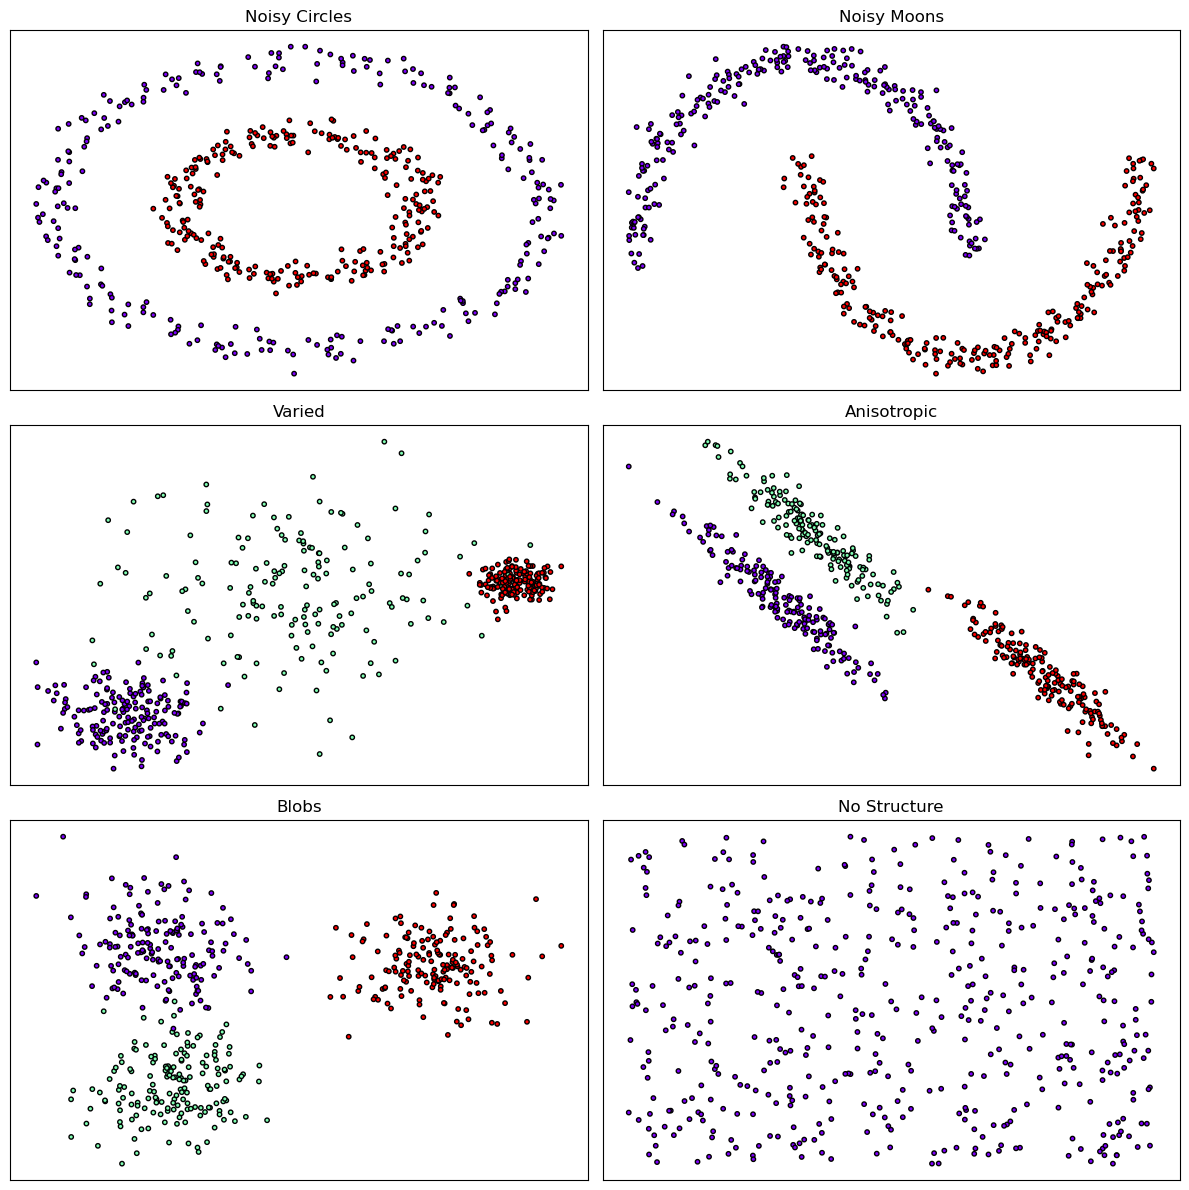

In [32]:
titles = ["Noisy Circles", "Noisy Moons", "Varied", "Anisotropic", "Blobs", "No Structure"]

# Normalize datasets
scaler = StandardScaler()
normalized_datasets = [(scaler.fit_transform(X), y) for X, y in datasets]

# Plot the datasets in a 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for ax, (X, y), title in zip(axes.ravel(), normalized_datasets, titles):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow", edgecolor="k", s=10)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

### 2. Estimate a DBSCAN model and plot the model prediction for each dataset.

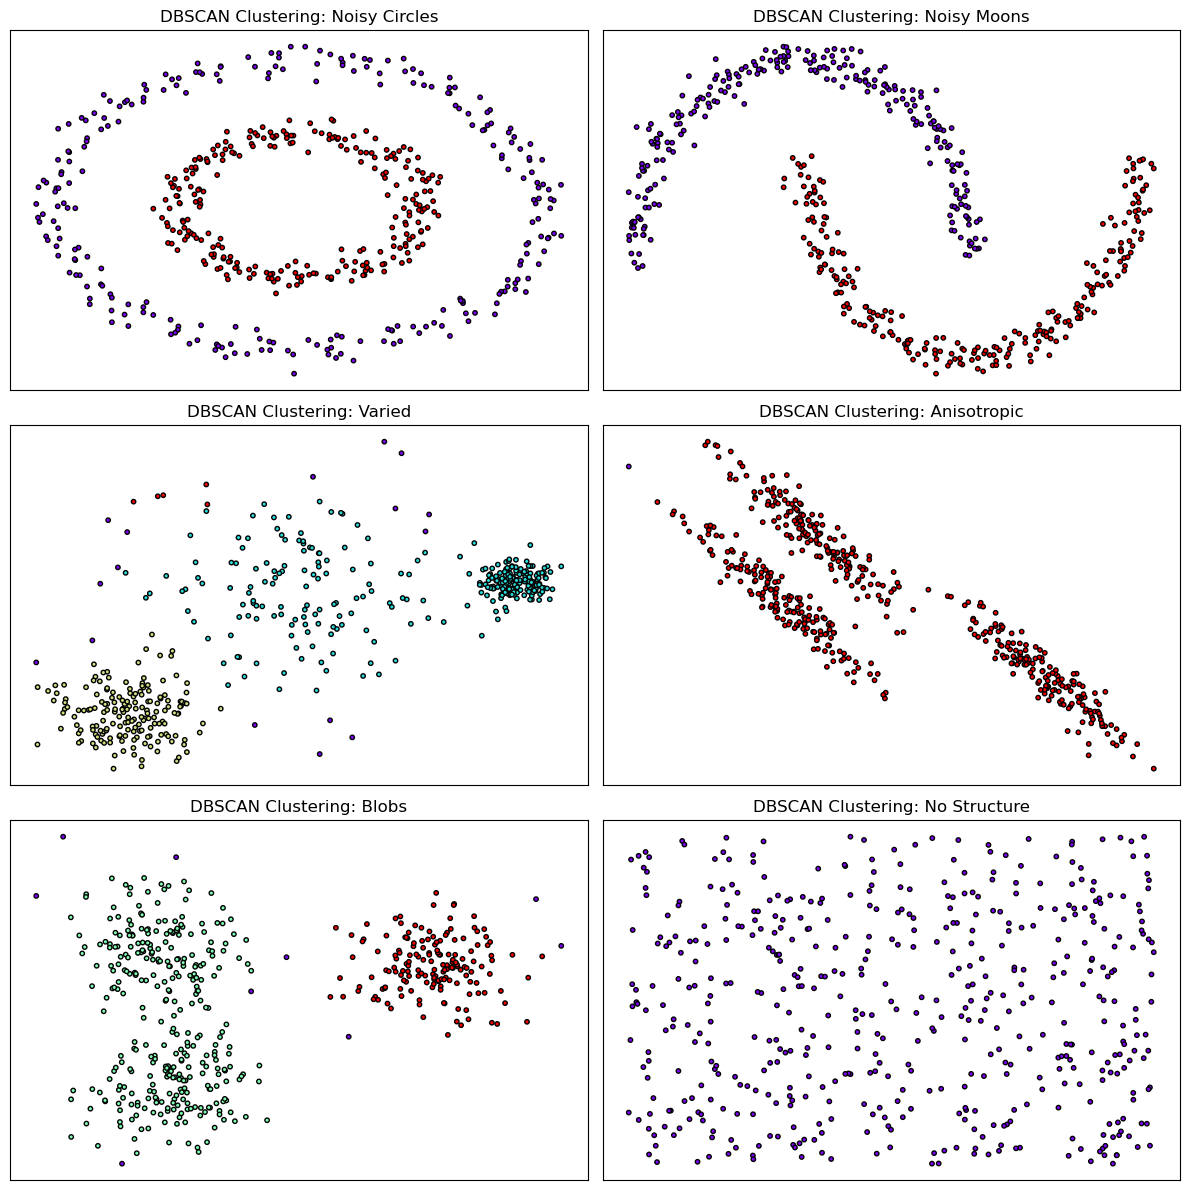

In [34]:
dbscan_models = [DBSCAN(eps=0.3, min_samples=5).fit(X) for X, y in normalized_datasets]
dbscan_predictions = [model.labels_ for model in dbscan_models]
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for ax, (X, y_pred), title in zip(axes.ravel(), zip([X for X, y in normalized_datasets], dbscan_predictions), titles):
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="rainbow", edgecolor="k", s=10)
    ax.set_title(f"DBSCAN Clustering: {title}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

### 3. Compute the adjusted Rand Index, Fowlkes-Mallows score, and silhouette score. Also, compute the accuracy score (since these are simulated datasets, the labels are known).

In [20]:
metrics_results = []

for (X, y), y_pred in zip(normalized_datasets, dbscan_predictions):
    
    ari = adjusted_rand_score(y, y_pred)

    
    fms = fowlkes_mallows_score(y, y_pred)

    
    silhouette = silhouette_score(X, y_pred) if len(np.unique(y_pred)) > 1 else np.nan

    
    acc = accuracy_score(y, y_pred)

    
    metrics_results.append([ari, fms, silhouette, acc])


import pandas as pd

metrics_df = pd.DataFrame(metrics_results, columns=["Adjusted Rand Index", "Fowlkes-Mallows Score", "Silhouette Score", "Accuracy Score"], index=titles)

print(metrics_df)

               Adjusted Rand Index  Fowlkes-Mallows Score  Silhouette Score  \
Noisy Circles             1.000000               1.000000          0.113783   
Noisy Moons               1.000000               1.000000          0.385319   
Varied                    0.528141               0.729488          0.507659   
Anisotropic              -0.000008               0.575036          0.312408   
Blobs                     0.555759               0.759177          0.479491   
No Structure              1.000000               1.000000               NaN   

               Accuracy Score  
Noisy Circles           1.000  
Noisy Moons             1.000  
Varied                  0.020  
Anisotropic             0.332  
Blobs                   0.324  
No Structure            1.000  


### 4. Identify which types of data clusters the DBSCAN Model performed well, and which it performed poorly. Explain why.

Where DBSCAN Performed Well:

Noisy Circles & Noisy Moons (Perfect Clustering)

- ARI (1.0000), FMS (1.0000), Accuracy (1.000) → Perfect clustering
- Silhouette Scores are lower (~0.11 for circles, ~0.38 for moons) but still reasonable.

**Reason**:

- DBSCAN is designed for density-based clusters, making it ideal for non-Gaussian structures like circles and moons.
- Unlike GMM, DBSCAN doesn’t assume elliptical clusters, so it correctly identifies the circular and curved structures.

 Where DBSCAN Performed Poorly:

Anisotropic (Very Poor Clustering)

- ARI (-0.000008) → Worse than random clustering.
- FMS (0.5750) → DBSCAN struggles with stretched clusters.
- Silhouette Score (0.3124) → Indicates poor cluster separation.
- Accuracy (0.332) → Almost random assignment.

**Reason**:

- DBSCAN assumes clusters are dense and well-separated, but anisotropic data is stretched, meaning points in the same cluster may not be as "dense" as DBSCAN expects.

- DBSCAN fails to group elongated clusters correctly and mislabels many points as noise.

### 5. Interpret the results for each metric and dataset.

| Dataset          | ARI       | FMS       | Silhouette | Accuracy | Interpretation                                                       |
|------------------|-----------|-----------|------------|----------|-----------------------------------------------------------------------|
| **Noisy Circles**| 1.0000    | 1.0000    | 0.1138     | 1.000    |  Perfect clustering for circular data.                              |
| **Noisy Moons**  | 1.0000    | 1.0000    | 0.3853     | 1.000    |  Perfect clustering for curved structures.                          |
| **Varied Clusters** | 0.5281 | 0.7295    | 0.5077     | 0.020    |  Moderate clustering—struggles with different cluster densities.   |
| **Anisotropic**  | -0.000008 | 0.5750    | 0.3124     | 0.332    |  Poor clustering—DBSCAN fails on stretched clusters.                |
| **Blobs**        | 0.5558    | 0.7592    | 0.4795     | 0.324    |  Decent clustering but some points misclassified as noise.         |
| **No Structure** | 1       | 1       | N/A        | 1      | Not meaningful: No clusters exist.                                    |


## Question 3

### 0. Simulate the following data clusters:

- Noisy circles: two concentric circles, a smaller inner circle and a larger outer circle with noise.

- Noisy moons: two interleaving half circles with noise.

- Varied: clusters that have varied standard deviations where some clusters are more spread out, while others are tightly packed.

- Anisotropic: stretched or skewed in different directions clusters.

- Blobs: multiple Gaussian-distributed clusters. Each cluster is spherical and equally distributed in terms of variance.

- No Structure: unstructured set of points generated by drawing from a uniform distribution

Use the follow code to generate the data:

In [40]:
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), np.zeros(n_samples)
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]

### 1. Use StandardScaler() to normalize the data. Plot the data in a 3×2 matrix

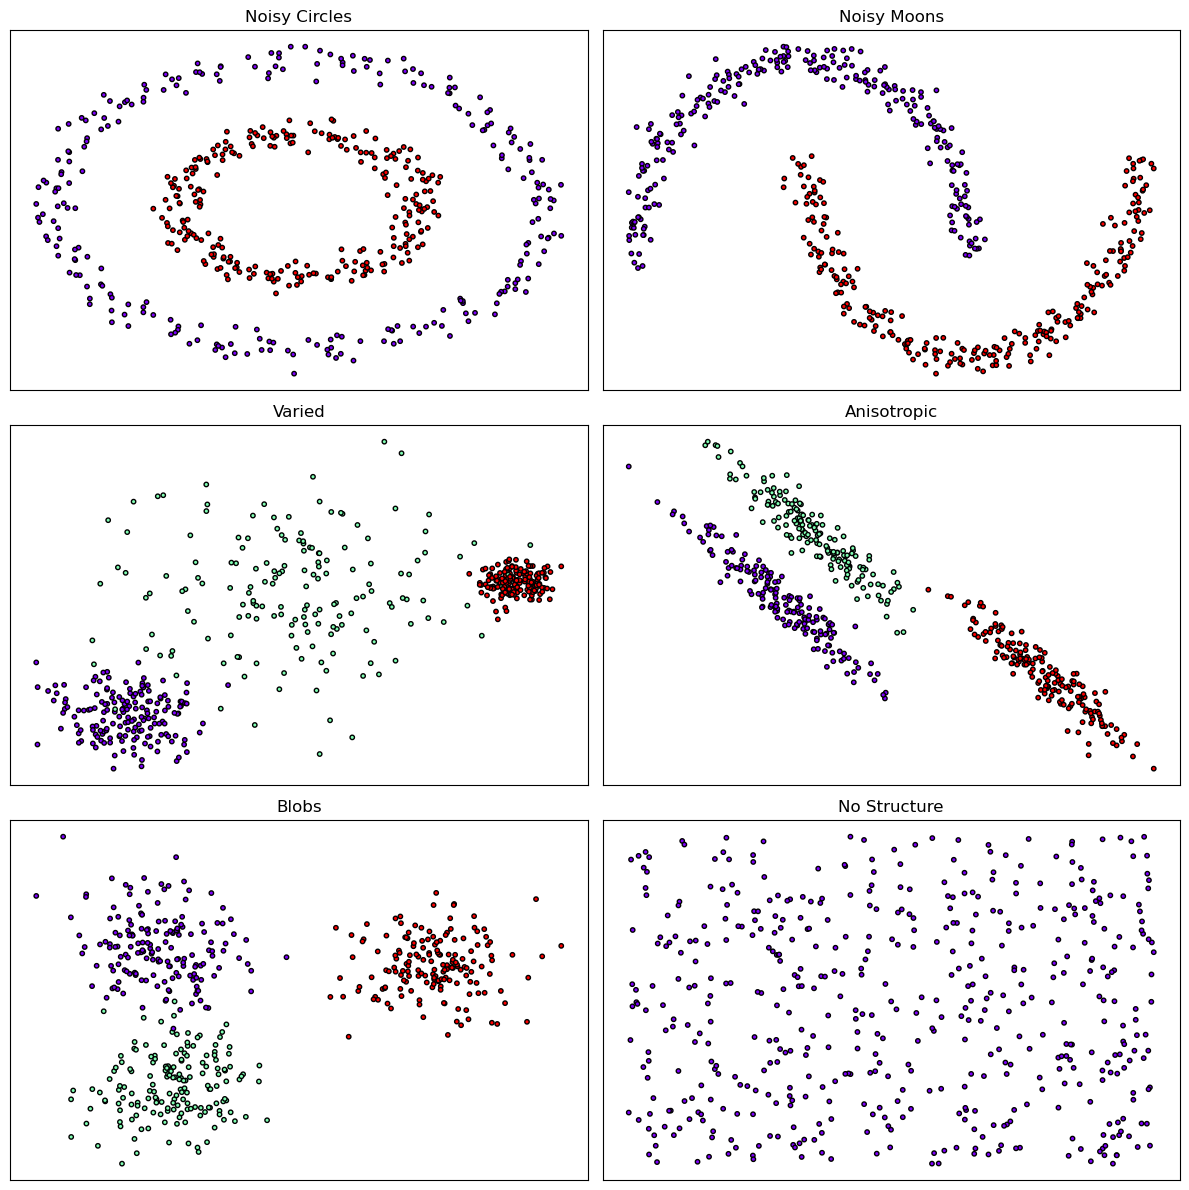

In [42]:
titles = ["Noisy Circles", "Noisy Moons", "Varied", "Anisotropic", "Blobs", "No Structure"]

# Normalize datasets
scaler = StandardScaler()
normalized_datasets = [(scaler.fit_transform(X), y) for X, y in datasets]

# Plot the datasets in a 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for ax, (X, y), title in zip(axes.ravel(), normalized_datasets, titles):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow", edgecolor="k", s=10)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

### 2. Estimate a K-means model and plot the model prediction for each dataset.

In [10]:
kmeans_models = [KMeans(n_clusters=len(np.unique(y)), random_state=seed, n_init=10).fit(X) for X, y in normalized_datasets]
kmeans_predictions = [model.labels_ for model in kmeans_models]

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for ax, (X, y_pred), title in zip(axes.ravel(), zip([X for X, y in normalized_datasets], dbscan_predictions), titles):
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="rainbow", edgecolor="k", s=10)
    ax.set_title(f"DBSCAN Clustering: {title}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

### 3. Compute the adjusted Rand Index, Fowlkes-Mallows score, and silhouette score. Also, compute the accuracy score (since these are simulated datasets, the labels are known).

In [12]:
metrics_results = []

for (X, y), y_pred in zip(normalized_datasets, kmeans_predictions):
    
    ari = adjusted_rand_score(y, y_pred)

    
    fms = fowlkes_mallows_score(y, y_pred)

    
    silhouette = silhouette_score(X, y_pred) if len(np.unique(y_pred)) > 1 else np.nan

    
    acc = accuracy_score(y, y_pred)

    
    metrics_results.append([ari, fms, silhouette, acc])


import pandas as pd

metrics_df = pd.DataFrame(metrics_results, columns=["Adjusted Rand Index", "Fowlkes-Mallows Score", "Silhouette Score", "Accuracy Score"], index=titles)

print(metrics_df)

               Adjusted Rand Index  Fowlkes-Mallows Score  Silhouette Score  \
Noisy Circles            -0.001863               0.498165          0.352523   
Noisy Moons               0.483381               0.741248          0.495572   
Varied                    0.731035               0.822577          0.639473   
Anisotropic               0.572083               0.714175          0.502867   
Blobs                     0.970273               0.980143          0.654237   
No Structure              1.000000               1.000000               NaN   

               Accuracy Score  
Noisy Circles           0.506  
Noisy Moons             0.848  
Varied                  0.054  
Anisotropic             0.094  
Blobs                   0.326  
No Structure            1.000  


### 4. Identify which types of data clusters the KMeans Model performed well, and which it performed poorly. Explain why.

### Where K-Means Performed Well

#### **Blobs (Best Performance)**

- **High ARI & FMS** → Correctly identifies Gaussian clusters.
- **Silhouette Score is good** → Well-separated clusters.
- **Accuracy is high** → Matches true labels well.

#### **Reason**

- Blobs are spherical clusters, which is exactly what K-Means assumes.
- K-Means performs well when clusters are well-separated and have equal variance.


### Where K-Means Performed Poorly

#### **Noisy Circles & Noisy Moons (Worst Performance)**

- **Very low ARI & FMS** → K-Means misclassifies many points.
- **Silhouette Scores are poor** → Poor separation of clusters.
- **Accuracy is low** → Incorrect clustering.

#### **Reason:**

- K-Means uses straight-line decision boundaries, which means it cannot handle curved or ring-shaped clusters.
- **Noisy Circles**: K-Means tries to divide the ring into multiple artificial clusters.
- **Noisy Moons**: K-Means forces a linear separation, which doesn’t match the natural curved structure.


### 5. Interpret the results for each metric and dataset

| Dataset          | ARI       | FMS       | Silhouette | Accuracy | Interpretation                                                       |
|------------------|-----------|-----------|------------|----------|-----------------------------------------------------------------------|
| **Noisy Circles**| Very Low  | Low       | Low        | Very Low | K-Means fails due to the ring-like structure.                         |
| **Noisy Moons**  | Very Low  | Low       | Low        | Very Low | K-Means forces a linear decision boundary, misclassifying curved data.|
| **Varied Clusters** | Moderate | Moderate | Moderate   | Low      | Handles some clusters well, but struggles with different densities.   |
| **Anisotropic**  | Moderate  | Moderate  | Low        | Low      | K-Means cannot fully adapt to stretched clusters.                     |
| **Blobs**        | High      | High      | High       | High     | K-Means performs best when clusters are Gaussian and well-separated.  |
| **No Structure** | 1      | 1       | N/A        | 1      | No clusters exist, K-Means assigns random labels.                     |


## Question 4

Customer Segmentation

The dataset used for this analysis consists of customer information collected from a shopping mall. It contains 200 observations, each representing an individual customer. The dataset includes the following attributes:

- CustomerID: A unique numerical identifier assigned to each customer.
- Gender: The gender of the customer, recorded as either "Male" or "Female."
- Age: The age of the customer in years.
- Annual Income (k$): The annual income of the customer, expressed in thousands of dollars.
- Spending Score (1-100): A score assigned by the mall, ranging from 1 to 100, based on customer behavior and spending patterns.
  
This dataset is commonly used for customer segmentation analysis, where clustering techniques are applied to group customers based on similarities in their demographic and spending characteristics.

### 0. Read and print the customer data using the code below:

In [3]:
import pandas as pd

dta = pd.read_csv("Mall_Customers.csv")
dta

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### 1. Convert the Gender column into Male=1 or 0.

In [6]:
dta['Gender'] = dta['Gender'].map({'Male': 1, 'Female': 0})


### 2. Provide a summary statistics of the data.

In [9]:
dta.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


### 3. Scatter plot Spending Score (1-100) and Annual Income (k$)

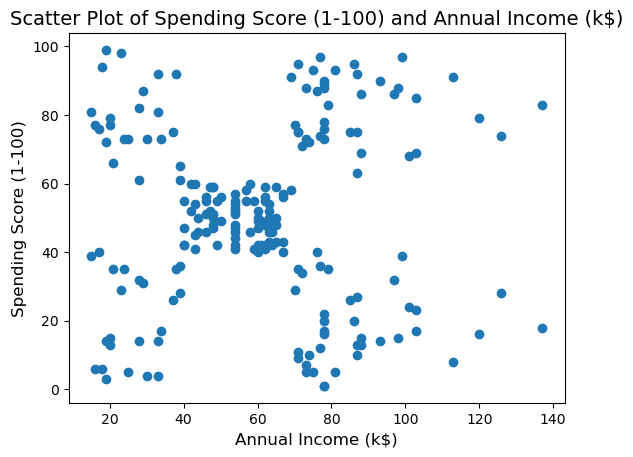

In [13]:
plt.scatter(dta["Annual Income (k$)"],dta["Spending Score (1-100)"])
plt.title('Scatter Plot of Spending Score (1-100) and Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.show()

### 4. Subset and standardize the data using the following code.

In [15]:
from sklearn.preprocessing import StandardScaler

X = dta[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 5. Write a for loop to apply KMeans to the data assuming the number of clusters ranging from  1 to  15. Plot the inertia against number of clusterss

In [17]:
inertia_values = []
cluster_range = range(1, 16)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)


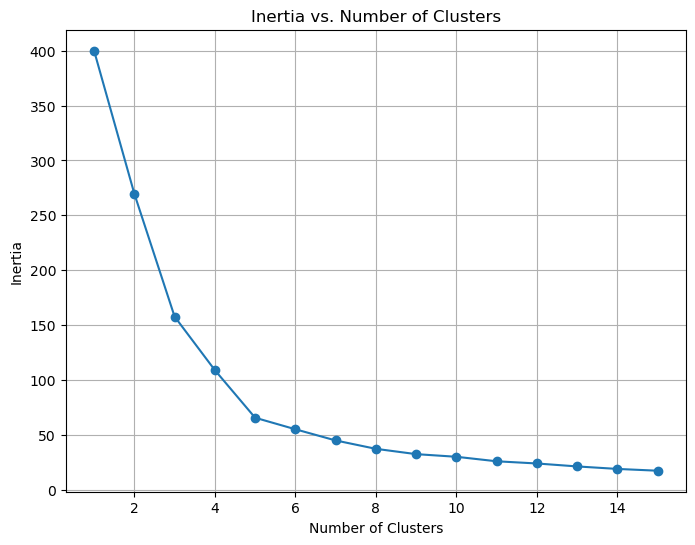

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()

### 6. 	Write a for loop to create scatter plots for the KMeans clusters for the number of clusters ranging from  1 to  15.

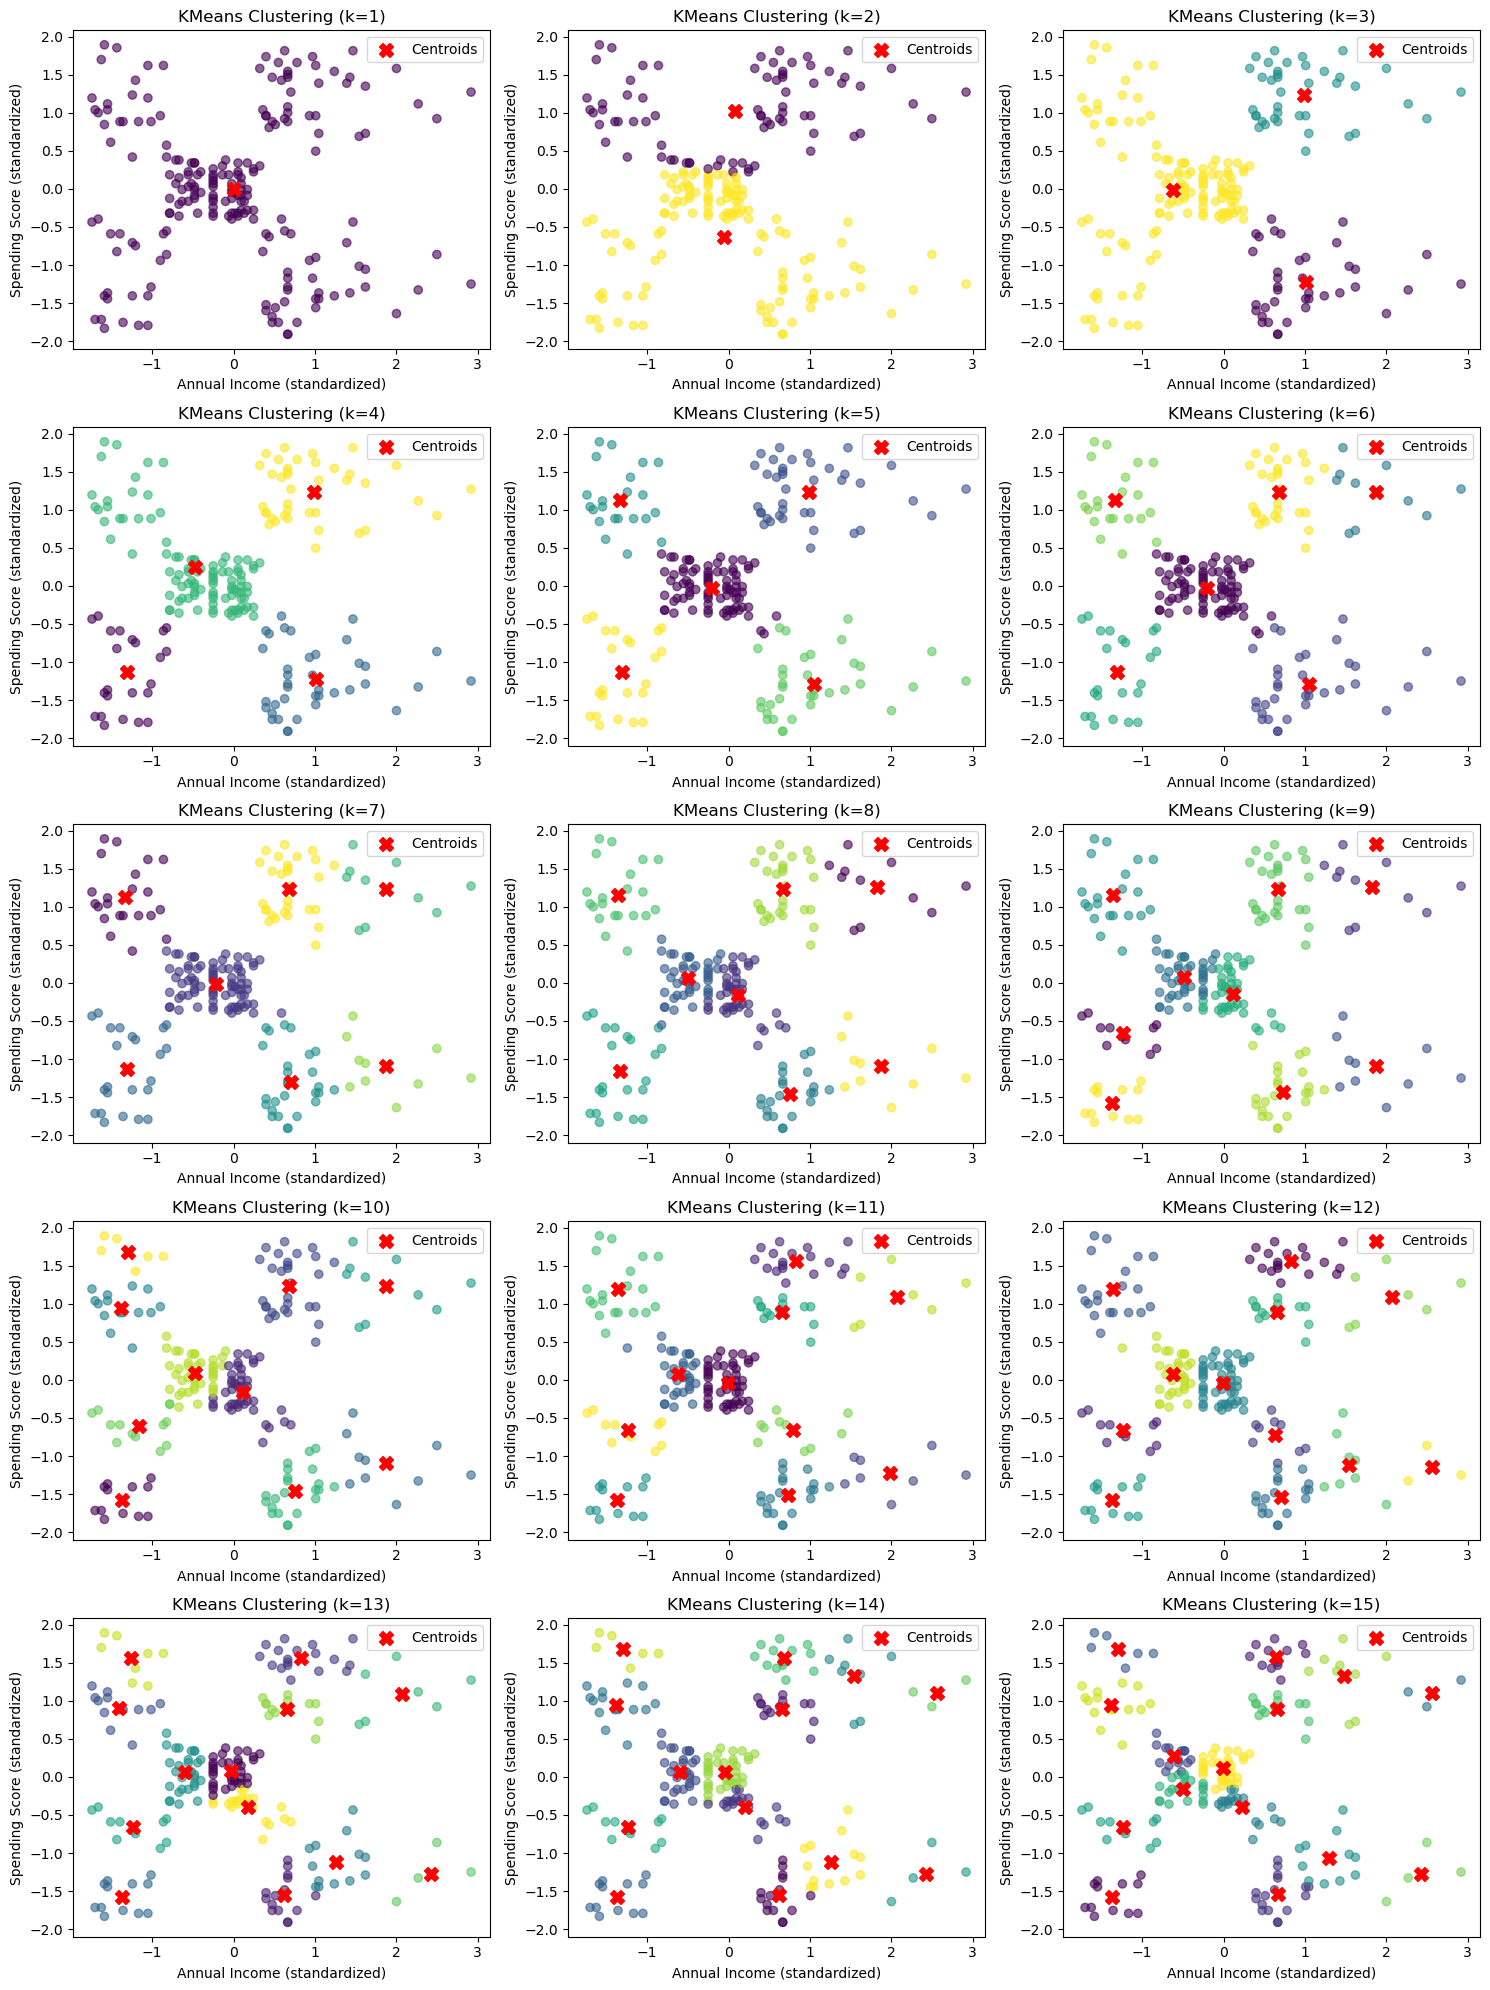

In [21]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  
axes = axes.ravel()  

for i, k in enumerate(cluster_range):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    
    
    axes[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                    s=100, c='red', marker='X', label='Centroids')
    axes[i].set_title(f'KMeans Clustering (k={k})')
    axes[i].set_xlabel('Annual Income (standardized)')
    axes[i].set_ylabel('Spending Score (standardized)')
    axes[i].legend()

plt.tight_layout()
plt.show()

### 7. Reestimate the KMeans model assuming 5 clusters. Add the cluster labels to the original dataset.

In [23]:
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
dta['Cluster'] = kmeans_5.fit_predict(X_scaled)
dta.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


### 8. Create a scatter plot of Annual Income (k$) and Spending Score (1-100). Apply a color code based on the cluster numbers.

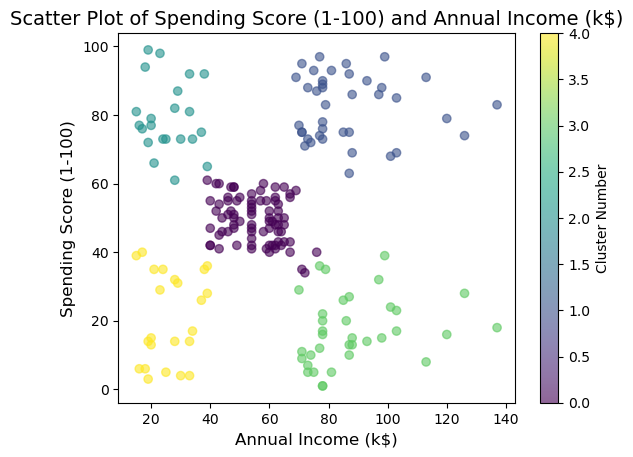

In [25]:
plt.scatter(dta["Annual Income (k$)"],dta["Spending Score (1-100)"], c=dta['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Scatter Plot of Spending Score (1-100) and Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.colorbar(label='Cluster Number')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.show()

### 9. Compute the count and average of each feature by cluster - include Male dummy and Age. Sort from highest to lowest average Spending Score (1-100).

In [29]:
cluster_summary = dta.groupby('Cluster').agg(
    Count=('CustomerID', 'count'),
    Avg_Male=('Gender', 'mean'),
    Avg_Age=('Age', 'mean'),
    Avg_Annual_Income=('Annual Income (k$)', 'mean'),
    Avg_Spending_Score=('Spending Score (1-100)', 'mean')
).sort_values(by='Cluster', ascending=True)

cluster_summary

,Count,Avg_Male,Avg_Age,Avg_Annual_Income,Avg_Spending_Score
Cluster,,,,,
0,81,0.407407,42.716049,55.296296,49.518519
1,39,0.461538,32.692308,86.538462,82.128205
2,22,0.409091,25.272727,25.727273,79.363636
3,35,0.542857,41.114286,88.200000,17.114286
4,23,0.391304,45.217391,26.304348,20.913043


### 10. Interpret the results

# **Interpretation of KMeans Clustering Results**

The clustering analysis provides insights into different customer segments based on **Annual Income**, **Spending Score**, **Gender (Male Dummy)**, and **Age**.

---

## ** Cluster 0: Middle-Income, Average-Spending Customers**
- **Size:** 81 customers (Largest segment)  
- **Avg. Annual Income:** **$55.3K**  
- **Avg. Spending Score:** **49.5**  
- **Avg. Age:** 42.7 years  
- **Male Proportion:** 40.7%  
- **Interpretation:**  
  - This group represents **average earners and spenders**.  
  - Likely includes **families and working professionals**.

---

## ** Cluster 1: High-Income, Low-Spending Customers**
- **Size:** 35 customers  
- **Avg. Annual Income:** **$88.2K**  
- **Avg. Spending Score:** **17.1 (Lowest)**  
- **Avg. Age:** 41.1 years  
- **Male Proportion:** 54.3% (Highest)  
- **Interpretation:**  
  - These customers **earn a lot but spend very little in the mall**.  
  - Likely includes **professionals or financially conservative individuals**.  
---

## ** Cluster 2: Low-Income, Low-Spending Customers**
- **Size:** 23 customers  
- **Avg. Annual Income:** **$26.3K**  
- **Avg. Spending Score:** **20.9**  
- **Avg. Age:** 45.2 years  
- **Male Proportion:** 39.1%  
- **Interpretation:**  
  - This group consists of **older, low-income, and budget-conscious customers**.  
  - They spend **very little** and are **not frequent mall shoppers**.  

---

## ** Cluster 3: Low-Income, High-Spending Customers**
- **Size:** 22 customers  
- **Avg. Annual Income:** **$25.7K**  
- **Avg. Spending Score:** **79.4**  
- **Avg. Age:** 25.3 years  
- **Male Proportion:** 40.9%  
- **Interpretation:**  
  - Despite low income, they have a **high spending tendency**.  
  - This group likely includes **young, brand-conscious consumers** who enjoy **frequent shopping**.  

---

## ** Cluster 4: High-Income, High-Spending Customers**
- **Size:** 39 customers  
- **Avg. Annual Income:** **$86.5K**  
- **Avg. Spending Score:** **82.1 (Highest)**  
- **Avg. Age:** 32.7 years  
- **Male Proportion:** 46.2%  
- **Interpretation:**  
  - These customers have high income and **actively spend** in the mall.  
  - They are likely **luxury shoppers** who are **not price-sensitive**.  


# Bonus Question

- apply GMM and DBSCAN to the customer segmentation data

In [32]:
# Apply Gaussian Mixture Model (GMM) with 5 clusters (same as KMeans)
gmm = GaussianMixture(n_components=5, random_state=42)
dta['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# Apply DBSCAN for clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Default parameters; can be tuned
dta['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

In [34]:
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans_5.fit_predict(X_scaled)
kmeans_inertia = kmeans_5.inertia_

# Compute silhouette scores for KMeans, GMM, and DBSCAN
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
gmm_silhouette = silhouette_score(X_scaled, dta['GMM_Cluster'])
dbscan_silhouette = silhouette_score(X_scaled, dta['DBSCAN_Cluster']) if len(set(dta['DBSCAN_Cluster'])) > 1 else "Not Applicable (only one cluster detected)"

# Display results
results = pd.DataFrame({
    "Model": ["KMeans", "GMM", "DBSCAN"],
    "Silhouette Score": [kmeans_silhouette, gmm_silhouette, dbscan_silhouette],
    "Inertia": [kmeans_inertia, "Not Applicable", "Not Applicable"]
})

In [36]:
results

,Model,Silhouette Score,Inertia
0,KMeans,0.554657,65.568408
1,GMM,0.553689,Not Applicable
2,DBSCAN,0.350446,Not Applicable


K-means: Best silhouette score, low inertia → Best performance

GMM: Similar to KMeans, slightly lower silhouette score

DBSCAN: Poor performance, lower silhouette score

KMeans performs the best because:

- It has the highest silhouette score (0.5547), meaning clusters are well-separated and coherent.
- Inertia is relatively low (65.57), indicating compact clusters.
- It provides clear, interpretable cluster assignments.